# Evaluación de desempeño

## Configuración inicial

Instancia de la clase `Analyst` que permite leer los datos en disco una única vez, mantener los datos en memoria, y calcular los requerimientos:

In [1]:
from Analyst import Analyst

analyst = Analyst()

Directorio de datos:

In [2]:
# definir el directorio manualmente
# data_dir = "/home/user/kaggle-justjoinit/data"

# opcionalmente con una variable de ambiente
data_dir = os.environ.get("DATA_DIR")

# data_dir

Los siguientes archivos de datos fueron renombrados por falta de consistencia dados posibles errores de escritura:

- "mediumemployments_types.csv" renombrado a "medium-employments_types.csv"

Funcionalidades varias para este documento:

In [3]:
from time import perf_counter, sleep

import pandas as pd


NUM_EXECUTIONS = 20

def time_fn(fn, *args, **kwargs):
    times = NUM_EXECUTIONS * [0]
    for n in range(NUM_EXECUTIONS):
        start = perf_counter()
        fn(*args)
        end = perf_counter()
        times[n] = end - start

    return pd.Series(times)


# ejemplo de estadísticas
times = time_fn(sleep, 0.5)
times.describe()

count    20.000000
mean      0.504470
std       0.008791
min       0.500430
25%       0.501126
50%       0.501376
75%       0.502221
max       0.539209
dtype: float64

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


def plot_fn_performance(df, fn_name, ax):
    stats_fields = ["min", "25%", "50%", "75%", "max"]
    fields = ["index", "dataset", "function", *stats_fields]

    assert isinstance(df, pd.DataFrame), "invalid df"
    assert pd.Series(fields).isin(df.columns).all(), "df missing fields"

    df = (
        df
        .query(f"function == \"{fn_name}\"")
        .sort_values("index", ascending=True)
    )

    plt.sca(ax)
    sns.set(style="whitegrid")
    for stat_field in stats_fields:
        sns.lineplot(df, x="index", y=stat_field, label=stat_field)

    plt.fill_between(df["index"], df["25%"], df["75%"], color='skyblue', alpha=0.4)

    ax.set_xticks(df["index"], labels=df["dataset"])
    plt.legend()
    plt.xlabel("Dataset size")
    plt.ylabel("Time [s]")
    plt.title(f"Performance: {fn_name}")


## Mediciones

Medición de ejecuciones de las funciones de requerimientos utilizando los mismos parámetros para processar distintos conjuntos de datos de tamaño creciente:

In [13]:
fn_args_map = {
    "requirement_1": [2, "PL", "junior"],
    "requirement_2": ["Gazelle Global IT Recruitment", "2023-08-31", "2023-09-02"],
    "requirement_3": ["PL", "2023-08-31", "2023-09-02"],
    "requirement_4": [10, "2022-04-09", "2023-09-02", "junior", "US"],
    "requirement_5": [4, "2022-04-09", "2023-09-02"],
}

measures_records = []
for percentile in range(10, 100, 10):
    _ = analyst.read_data_dir(data_dir, prefix=f"{percentile}-por")

    for (fn_name, args) in fn_args_map.items():
        times = time_fn(getattr(analyst, fn_name), *args)
        stats = times.describe().to_dict()
        record = {"dataset": f"{percentile}%", "function": fn_name, **stats}
        measures_records.append(record)

measures = pd.DataFrame(measures_records).reset_index()
measures

,index,dataset,function,count,mean,std,min,25%,50%,75%,max
0,0,10%,requirement_1,20.0,0.046517,0.002454,0.043805,0.044906,0.045577,0.048579,0.052594
1,1,10%,requirement_2,20.0,0.042233,0.005439,0.037031,0.037792,0.039595,0.046201,0.053486
2,2,10%,requirement_3,20.0,0.192881,0.008011,0.184327,0.186095,0.190489,0.198425,0.209099
3,3,10%,requirement_4,20.0,0.167491,0.012269,0.156656,0.160141,0.162341,0.166464,0.198878
4,4,10%,requirement_5,20.0,0.633827,0.022284,0.599197,0.612696,0.632225,0.653233,0.677729
5,5,20%,requirement_1,20.0,0.073364,0.002469,0.070428,0.071624,0.072865,0.074063,0.079222
6,6,20%,requirement_2,20.0,0.067715,0.008208,0.059493,0.061855,0.064232,0.071068,0.087782
7,7,20%,requirement_3,20.0,0.381520,0.035725,0.339831,0.351306,0.373874,0.404497,0.485141
8,8,20%,requirement_4,20.0,0.291215,0.023062,0.272853,0.277307,0.281889,0.292905,0.348329
9,9,20%,requirement_5,20.0,1.071961,0.011469,1.054711,1.063568,1.069438,1.077955,1.099133


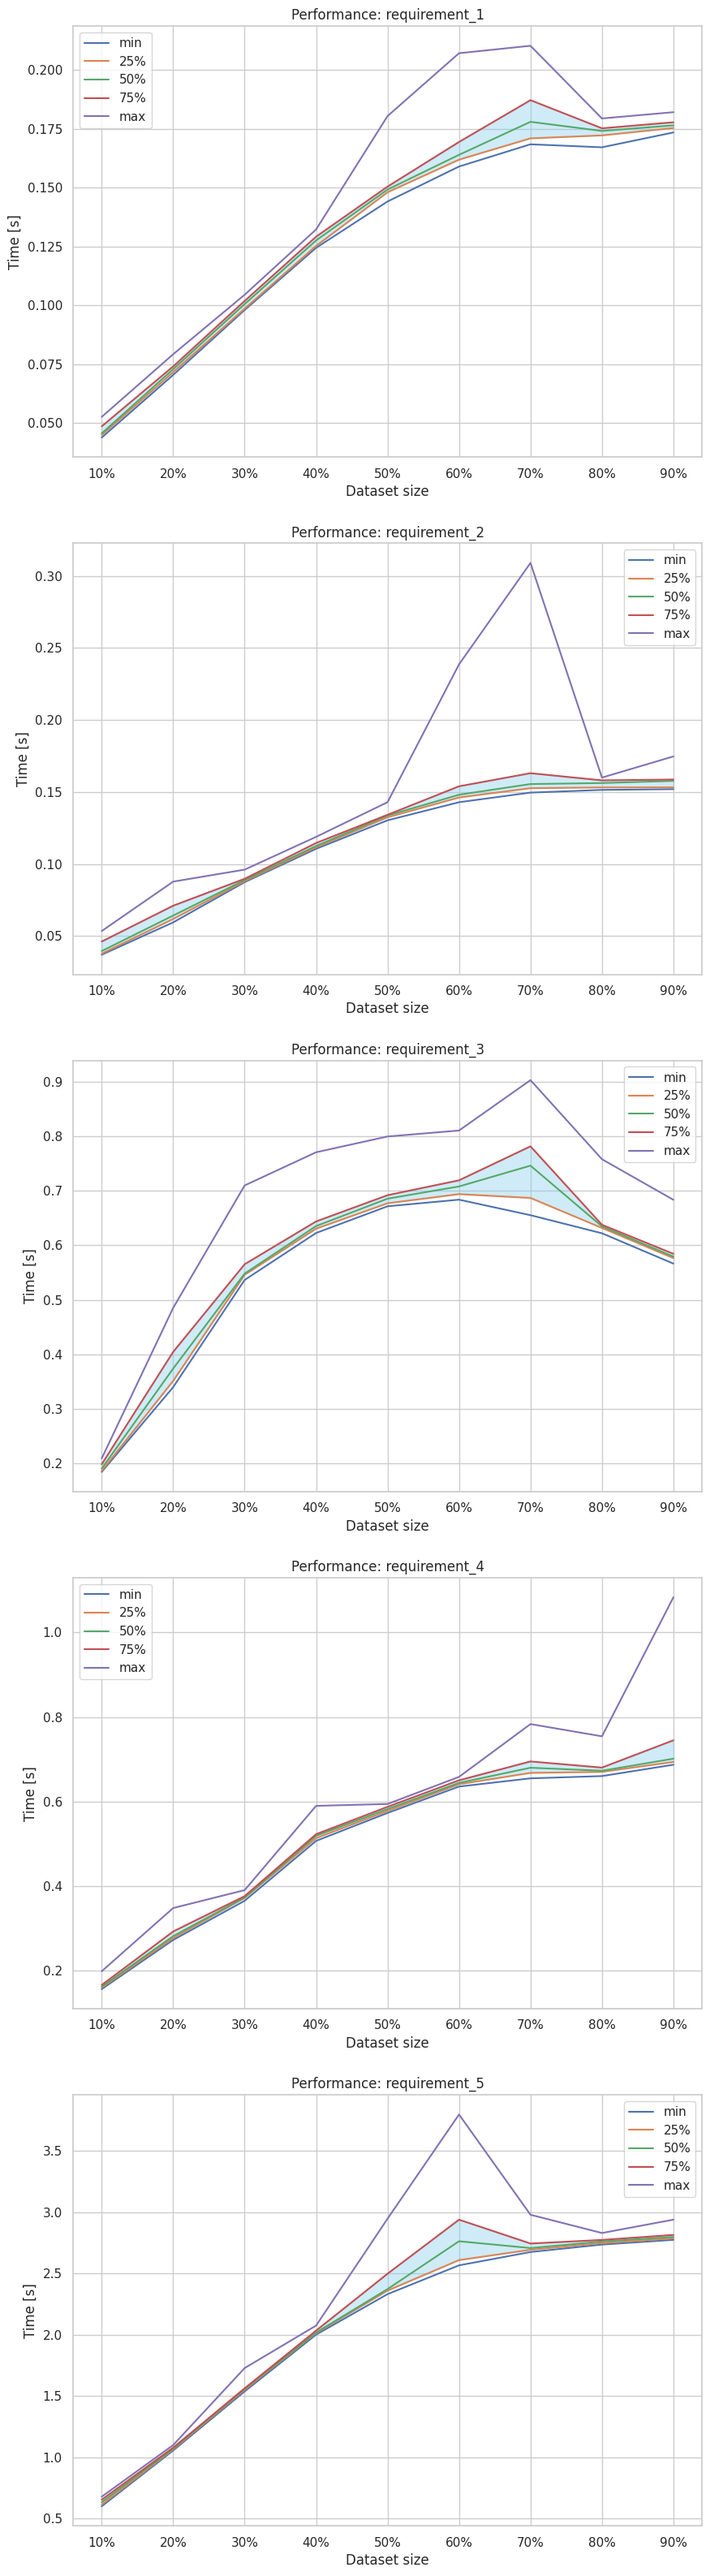

In [14]:
fig, axs = plt.subplots(5, 1, figsize=(10, 40))
for n in range(5):
    plot_fn_performance(measures, f"requirement_{n+1}", axs[n])

plt.show()